## Mini Project - European Soccer Dataset

Veri setini Kaggle üzerinden indirebilirsiniz:
https://www.kaggle.com/hugomathien/soccer

In [71]:
#Paketler
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Veri Okuma ve İlk Bakış

In [72]:
#Sqlite uzantılı veri tabanı dosyasını python ile okumak:
cnx = sqlite3.connect('database.sqlite')
Player_Data = pd.read_sql_query("SELECT * FROM Player", cnx)
Player_Attributes = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

#bu kısma dokunmayın.

1. Player_Data'nın ve Player_Attributes'un ilk 5 satırını gösterin.

In [73]:
def showTopKData(data,k):
    print(data.iloc[:k])

In [74]:
#Player_Data'nın ve Player_Attributes'un ilk 5 satırını gösterilmesi
print('Player Data:')
showTopKData(Player_Data,5)
print('Player Attributes Data:')
showTopKData(Player_Attributes,5)

Player Data:
   id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   
2   3         162549         Aaron Doran              186170   
3   4          30572       Aaron Galindo              140161   
4   5          23780        Aaron Hughes               17725   

              birthday  height  weight  
0  1992-02-29 00:00:00  182.88     187  
1  1989-12-15 00:00:00  170.18     146  
2  1991-05-13 00:00:00  170.18     163  
3  1982-05-08 00:00:00  182.88     198  
4  1979-11-08 00:00:00  182.88     154  
Player Attributes Data:
   id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4   

2. Player_Data'nın ve Player_Attributes'un her kolonunun veri tipini (Dtype) ve her kolondaki eksik eleman sayısını (null-count) birer tablo içerisinde gösterin. 

In [75]:
def showDataType(data):
    print(data.dtypes)

In [76]:
def getMissingColumnsCount(data):
     #print(pd.DataFrame(data, columns = list(data.columns)).isnull().sum())
    new_Data=pd.DataFrame(data, columns = list(data.columns)).isnull()
    column_missing_dict = {}
    for i in range(len(data.columns)) : 
        total_missing_column=0
        for j in range(len(data)):
            if(new_Data.iloc[j, i] == True):
                total_missing_column=total_missing_column+1   
        column_missing_dict[list(data.columns)[i]]= total_missing_column     
    print(column_missing_dict) 
    return column_missing_dict

In [77]:
print('shows player data frame every columns data type')
showDataType(Player_Data)
print('shows Player_Attributes data frame every columns data type')
showDataType(Player_Attributes)
print('missing columns count for Player_Data')
getMissingColumnsCount(Player_Data)
print('missing columns count for Player_Attributes')
getMissingColumnsCount(Player_Attributes)

shows player data frame every columns data type
id                      int64
player_api_id           int64
player_name            object
player_fifa_api_id      int64
birthday               object
height                float64
weight                  int64
dtype: object
shows Player_Attributes data frame every columns data type
id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility           

{'id': 0,
 'player_fifa_api_id': 0,
 'player_api_id': 0,
 'date': 0,
 'overall_rating': 836,
 'potential': 836,
 'preferred_foot': 836,
 'attacking_work_rate': 3230,
 'defensive_work_rate': 836,
 'crossing': 836,
 'finishing': 836,
 'heading_accuracy': 836,
 'short_passing': 836,
 'volleys': 2713,
 'dribbling': 836,
 'curve': 2713,
 'free_kick_accuracy': 836,
 'long_passing': 836,
 'ball_control': 836,
 'acceleration': 836,
 'sprint_speed': 836,
 'agility': 2713,
 'reactions': 836,
 'balance': 2713,
 'shot_power': 836,
 'jumping': 2713,
 'stamina': 836,
 'strength': 836,
 'long_shots': 836,
 'aggression': 836,
 'interceptions': 836,
 'positioning': 836,
 'vision': 2713,
 'penalties': 836,
 'marking': 836,
 'standing_tackle': 836,
 'sliding_tackle': 2713,
 'gk_diving': 836,
 'gk_handling': 836,
 'gk_kicking': 836,
 'gk_positioning': 836,
 'gk_reflexes': 836}

3. Player_Data'nın ve Player_Attributes'un her kolonunun satır sayısı (count), kolon ortalaması (mean), standart sapma (std), min, max ve percentile (.25, .5, .75) değerlerini bir tablo içerisinde gösterin.

In [78]:
def quantileDataInfo(data,perc):
    print("Shows each column of percentile:", end =str(perc))
    print()
    print(data.quantile(perc, axis = 0))
    

In [79]:
def istatisticalDataInformation(data):
    print("Number of rows:", end =str(len(data)))
    print()
    print("Number of columns:", end =str(len(data.columns)))
    print()
    print("Mean of each columns")
    print(data.mean(axis = 0))
    print()
    print("Standard deviation of each columns")
    print(data.std(axis = 0, skipna = True))
    print()
    print("Shows the max of each column:")
    print(data.max()) 
    print()
    print("Shows the min of each column:")
    print(data.min()) 
    print()
    quantileDataInfo(data,.25)
    quantileDataInfo(data,.5)
    quantileDataInfo(data,.75)    

In [80]:
#answer of problem 3:
istatisticalDataInformation(Player_Data)
#istatisticalDataInformation(Player_Attributes)

Number of rows:11060
Number of columns:7
Mean of each columns
id                      5537.511392
player_api_id         156582.427215
player_fifa_api_id    165664.910488
height                   181.867445
weight                   168.380289
dtype: float64

Standard deviation of each columns
id                      3197.692647
player_api_id         160713.700624
player_fifa_api_id     58649.928360
height                     6.369201
weight                    14.990217
dtype: float64

Shows the max of each column:
id                                      11075
player_api_id                          750584
player_name           dos Santos Fabio Junior
player_fifa_api_id                     234141
birthday                  1999-04-24 00:00:00
height                                 208.28
weight                                    243
dtype: object

Shows the min of each column:
id                                      1
player_api_id                        2625
player_name            Aaron A

#### Veri Düzenleme & Temizleme

4. Player_Data'daki "birthday" kolonunu Pandas'ın datetime biçimine çevirin ve yeni bir kolon olarak bu tabloya ekleyin. Tablonun son halinin ilk 5 satırını gösterin.

In [81]:
def ConvertPandasDateTime(data,existingColumnName,newColumnName):
    # soru: aşağıdaki şekilde çalışmadı generic yazmak için kullanacaktım sebebi hakkında bilgi verebilirseniz sevinirim.
    #aşağıdakini çalıştıramadıgm için if koşulu yazarak durumu ayrıştırdım.
    #data[newColumnName]=data.apply(lambda row: pd.to_datetime(row.existingColumnName),axis=1)
    if newColumnName == 'date_datetime':
        data[newColumnName]=data.apply(lambda row: pd.to_datetime(row.date),axis=1)
    else:
        data[newColumnName]=data.apply(lambda row: pd.to_datetime(row.birthday),axis=1)


In [82]:
ConvertPandasDateTime(Player_Attributes,"date",'date_datetime')
ConvertPandasDateTime(Player_Data,"birthday",'birthday_datetime')
showTopKData(Player_Data,5)
showTopKData(Player_Attributes,5)

   id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   
2   3         162549         Aaron Doran              186170   
3   4          30572       Aaron Galindo              140161   
4   5          23780        Aaron Hughes               17725   

              birthday  height  weight birthday_datetime  
0  1992-02-29 00:00:00  182.88     187        1992-02-29  
1  1989-12-15 00:00:00  170.18     146        1989-12-15  
2  1991-05-13 00:00:00  170.18     163        1991-05-13  
3  1982-05-08 00:00:00  182.88     198        1982-05-08  
4  1979-11-08 00:00:00  182.88     154        1979-11-08  
   id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3             

5. Player_Data tablosundaki date (pandas datetime tipindeki) ve birthday kolonlarını kullanarak "age" kolonu ekleyin.

In [83]:
#Player_Attributes yada Player_Data tablosunda date ve birthday alanı birlikte değil
#date Player_Attributes tablosunda birthday Player_Data tablosunda player_api_id'ye göre mapping yaptıktan sonra
#age alanını düzelttim.Bu metodda şuanki yaşını buldum. İleride age kısmını istediginiz şekilde düzelttim.
def calculateAndAddAge(data):
    #data['age']=data.apply(lambda row: (pd.to_datetime(row.date_datetime)-pd.to_datetime(row.birthday)),axis=1).astype('<m8[Y]')  
    data['age']=data.apply(lambda row: (pd.Timestamp('now')-pd.to_datetime(row.birthday_datetime)),axis=1).astype('<m8[Y]')  
    print(data)
    

In [84]:
calculateAndAddAge(Player_Data)

          id  player_api_id          player_name  player_fifa_api_id  \
0          1         505942   Aaron Appindangoye              218353   
1          2         155782      Aaron Cresswell              189615   
2          3         162549          Aaron Doran              186170   
3          4          30572        Aaron Galindo              140161   
4          5          23780         Aaron Hughes               17725   
...      ...            ...                  ...                 ...   
11055  11071          26357       Zoumana Camara                2488   
11056  11072         111182         Zsolt Laczko              164680   
11057  11073          36491            Zsolt Low              111191   
11058  11074          35506  Zurab Khizanishvili               47058   
11059  11075          39902   Zvjezdan Misimovic              102359   

                  birthday  height  weight birthday_datetime   age  
0      1992-02-29 00:00:00  182.88     187        1992-02-29  28.0

6. Player_Data'daki Ağırlık ve Boy kolonlarını kullanarak vücut kitle endeksini (BMI) hesaplayın ve yeni bir kolon olarak ekleyin. Verinin son halinin ilk 5 satırını gösterin.

In [85]:
def calculateBMI(data):
    data['BMI'] = data.apply(lambda x: (x.weight/x.height**2), axis=1)
    showTopKData(data,5)

In [86]:
calculateBMI(Player_Data)

   id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   
2   3         162549         Aaron Doran              186170   
3   4          30572       Aaron Galindo              140161   
4   5          23780        Aaron Hughes               17725   

              birthday  height  weight birthday_datetime   age       BMI  
0  1992-02-29 00:00:00  182.88     187        1992-02-29  28.0  0.005591  
1  1989-12-15 00:00:00  170.18     146        1989-12-15  30.0  0.005041  
2  1991-05-13 00:00:00  170.18     163        1991-05-13  29.0  0.005628  
3  1982-05-08 00:00:00  182.88     198        1982-05-08  38.0  0.005920  
4  1979-11-08 00:00:00  182.88     154        1979-11-08  40.0  0.004605  


7. Kolonlardaki eksik eleman sayılarını kontrol edip eksik hücreleri ilgili kolonun ortalaması ile dolduran veya eksik hücre içeren satırları silen bir fonksiyon yazın. Bu fonksiyon, eğer kolondaki eksik hücre sayısı toplam uzunluğun %10'undan küçük ise (bu değer değişken olarak fonksiyona verilebilmelidir), eksik elemanları doldurur; değilse ilgili satırı siler. Sonuç olarak da kaç satırı sildiğini veya ortalama ile doldurduğunu print eder. Fonksiyon içerisinde gerekli kontroller yapılmalı ve conditionlara bağlı olarak gereken aksiyonlar gerçekleştirilmelidir. Fonksiyonun çalışmasından sonra elde edilen yeni veri setinin uzunluğu orijinal veri setinin yüzde kaçına denk geliyor, print edin. 

In [87]:
def fillMissingValueWithMean(data,i):
    new_Data=pd.DataFrame(data, columns = list(data.columns)).isnull()
    if(data.iloc[:,i].dtype == 'float64'):
        mean_value=data.iloc[:,i].mean()
    else:
        mean_value=data.iloc[:,i][0]
    for j in range(len(data)):
        if(new_Data.iloc[j, i] == True): 
            data.iloc[j, i]=mean_value            
    print("After missing value operation mean value:", end =str(mean_value))
    print()
    return data

In [88]:
def deleteMissingValue(data,i):
    new_Data=pd.DataFrame(data, columns = list(data.columns)).isnull()
    deleted_number=0
    for j in range(len(data)):
        if(new_Data.iloc[j, i] == True):
            data.drop([data.index[j]])
            deleted_number=deleted_number+1
    print("After missing value operation number of deleted rows:", end =str(deleted_number))     
    print()
    return data    

In [89]:
def preprocessOperation(data,percentage,column_missing_dict):
    total_length=len(data)

    for i in range(len(data.columns)):
        if( column_missing_dict[data.columns[i]] != 0 and
            column_missing_dict[data.columns[i]] /total_length *100 < total_length*percentage):
            data=fillMissingValueWithMean(data,i)
        elif(column_missing_dict[data.columns[i]] != 0 and 
             (column_missing_dict[data.columns[i]] /total_length)*100 >= total_length*percentage):
            data=deleteMissingValue(data,i)
    print(data)    
    return data

In [90]:
column_missing_dict = getMissingColumnsCount(Player_Attributes)
preprocessOperation(Player_Attributes,0.10,column_missing_dict)

{'id': 0, 'player_fifa_api_id': 0, 'player_api_id': 0, 'date': 0, 'overall_rating': 836, 'potential': 836, 'preferred_foot': 836, 'attacking_work_rate': 3230, 'defensive_work_rate': 836, 'crossing': 836, 'finishing': 836, 'heading_accuracy': 836, 'short_passing': 836, 'volleys': 2713, 'dribbling': 836, 'curve': 2713, 'free_kick_accuracy': 836, 'long_passing': 836, 'ball_control': 836, 'acceleration': 836, 'sprint_speed': 836, 'agility': 2713, 'reactions': 836, 'balance': 2713, 'shot_power': 836, 'jumping': 2713, 'stamina': 836, 'strength': 836, 'long_shots': 836, 'aggression': 836, 'interceptions': 836, 'positioning': 836, 'vision': 2713, 'penalties': 836, 'marking': 836, 'standing_tackle': 836, 'sliding_tackle': 2713, 'gk_diving': 836, 'gk_handling': 836, 'gk_kicking': 836, 'gk_positioning': 836, 'gk_reflexes': 836, 'date_datetime': 0}
After missing value operation mean value:68.6000152886831
After missing value operation mean value:73.46035316857957
After missing value operation mean

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,date_datetime
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016-02-18
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015-11-19
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015-09-21
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2015-03-20
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2007-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,2009-08-30
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,2009-02-22
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,2008-08-30
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0,2007-08-30


In [91]:
column_missing_dict2 = getMissingColumnsCount(Player_Data)
preprocessOperation(Player_Data,0.10,column_missing_dict2)

{'id': 0, 'player_api_id': 0, 'player_name': 0, 'player_fifa_api_id': 0, 'birthday': 0, 'height': 0, 'weight': 0, 'birthday_datetime': 0, 'age': 0, 'BMI': 0}
          id  player_api_id          player_name  player_fifa_api_id  \
0          1         505942   Aaron Appindangoye              218353   
1          2         155782      Aaron Cresswell              189615   
2          3         162549          Aaron Doran              186170   
3          4          30572        Aaron Galindo              140161   
4          5          23780         Aaron Hughes               17725   
...      ...            ...                  ...                 ...   
11055  11071          26357       Zoumana Camara                2488   
11056  11072         111182         Zsolt Laczko              164680   
11057  11073          36491            Zsolt Low              111191   
11058  11074          35506  Zurab Khizanishvili               47058   
11059  11075          39902   Zvjezdan Misimovic  

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,birthday_datetime,age,BMI
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992-02-29,28.0,0.005591
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,1989-12-15,30.0,0.005041
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,1991-05-13,29.0,0.005628
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,1982-05-08,38.0,0.005920
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,1979-11-08,40.0,0.004605
...,...,...,...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168,1979-04-03,41.0,0.005023
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176,1986-12-18,33.0,0.005262
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154,1979-04-29,41.0,0.004735
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172,1981-10-06,38.0,0.005003


8. Player_Data ve Player_Attributes tablolarında ortak olarak bulunan player_api_id kolonundaki değerleri kullanarak Player_Data tablosundaki player_name, birthday, age, height ve BMI kolonlarını Player_Attributes tablosuna ilave edin (mapping). 
Tablonun son halinin ilk 5 satırını print edin. 

In [92]:
Player_Attributes['player_name'] =Player_Attributes['player_api_id'].map(Player_Data.set_index('player_api_id')['player_name'])
Player_Attributes['age'] =Player_Attributes['player_api_id'].map(Player_Data.set_index('player_api_id')['age'])
Player_Attributes['birthday'] =Player_Attributes['player_api_id'].map(Player_Data.set_index('player_api_id')['birthday'])
Player_Attributes['height'] =Player_Attributes['player_api_id'].map(Player_Data.set_index('player_api_id')['height'])
Player_Attributes['BMI'] =Player_Attributes['player_api_id'].map(Player_Data.set_index('player_api_id')['BMI'])
showTopKData(Player_Attributes,5)

   id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

   ...  gk_handling  gk_ki

In [93]:
#düzeltilmiş hali .#age alanı oynandıgı zamana göre hesaplanmalıdır.
def calculateAndAddAge(data):
    data.drop(['age'], axis=1)
    data['age']=data.apply(lambda row: (pd.to_datetime(row.date_datetime)-pd.to_datetime(row.birthday)),axis=1).astype('<m8[Y]')  
    print(data)


In [94]:
calculateAndAddAge(Player_Attributes)

            id  player_fifa_api_id  player_api_id                 date  \
0            1              218353         505942  2016-02-18 00:00:00   
1            2              218353         505942  2015-11-19 00:00:00   
2            3              218353         505942  2015-09-21 00:00:00   
3            4              218353         505942  2015-03-20 00:00:00   
4            5              218353         505942  2007-02-22 00:00:00   
...        ...                 ...            ...                  ...   
183973  183974              102359          39902  2009-08-30 00:00:00   
183974  183975              102359          39902  2009-02-22 00:00:00   
183975  183976              102359          39902  2008-08-30 00:00:00   
183976  183977              102359          39902  2007-08-30 00:00:00   
183977  183978              102359          39902  2007-02-22 00:00:00   

        overall_rating  potential preferred_foot attacking_work_rate  \
0                 67.0       71.0      

#### Sorular

9. Player_Attributes tablosundaki player_api_id kolonunu kullanarak tabloda kaç tekil (unique) oyuncunun bulunduğunu print edin. Buna göre her oyuncu tabloda ortalama kaç kez yer alıyor?

In [95]:
Player_Attributes.player_api_id .unique().size #number of unique player.

11060

In [100]:
#Player_Attributes[Player_Attributes['player_api_id']==2625]
print (Player_Attributes.groupby('player_api_id')['id'].nunique())


player_api_id
2625      14
2752      21
2768      21
2770      15
2790       5
          ..
744907    11
746419     2
748432     2
750435     9
750584     2
Name: id, Length: 11060, dtype: int64


10. Player_Attributes tablosundaki ortalama ratingi en yüksek oyuncu kimdir ve id'si nedir? Bu oyuncuya ait verileri Player_Sample isimli ayrı bir tabloya kopyalayın ve bu tabloyu date kolonuna göre yeniden eskiye doğru sıralayarak print edin.

In [101]:
Player_Attributes[Player_Attributes['overall_rating']==Player_Attributes['overall_rating'].max()][['id','player_name']]

,id,player_name
102482,102483,Lionel Messi
102483,102484,Lionel Messi
102484,102485,Lionel Messi
102491,102492,Lionel Messi
102492,102493,Lionel Messi
102493,102494,Lionel Messi
102494,102495,Lionel Messi
102495,102496,Lionel Messi
102496,102497,Lionel Messi
102497,102498,Lionel Messi


In [102]:
Player_Sample=Player_Attributes[Player_Attributes['player_name']=='Lionel Messi']
Player_Sample.sort_values(by='date') #hangi date istedigi belirtilmemiş
#Player_Sample.sort_values(by='date_datetime') #hangi date istedigi belirtilmemiş iki date içinde çalışıyor.
print(Player_Sample)

            id  player_fifa_api_id  player_api_id                 date  \
102482  102483              158023          30981  2015-12-17 00:00:00   
102483  102484              158023          30981  2015-10-16 00:00:00   
102484  102485              158023          30981  2015-09-21 00:00:00   
102485  102486              158023          30981  2015-06-26 00:00:00   
102486  102487              158023          30981  2015-03-13 00:00:00   
102487  102488              158023          30981  2015-02-20 00:00:00   
102488  102489              158023          30981  2015-01-23 00:00:00   
102489  102490              158023          30981  2014-10-17 00:00:00   
102490  102491              158023          30981  2014-09-18 00:00:00   
102491  102492              158023          30981  2014-04-25 00:00:00   
102492  102493              158023          30981  2013-11-15 00:00:00   
102493  102494              158023          30981  2013-09-20 00:00:00   
102494  102495              158023    

11. Sağ ayaklı oyuncuların sol ayaklı oyunculara göre ratinglerinde kayda değer bir fark var mı? Ortalamaları üzerinden kıyaslayın.

In [103]:
#Player_Attributes.preferred_foot .unique() preprocessden dolayı None ifade kalmadı
print(Player_Attributes[Player_Attributes['preferred_foot']=='right']['overall_rating'].mean())
print(Player_Attributes[Player_Attributes['preferred_foot']=='left']['overall_rating'].mean())
#ortalamaları birbirine yakındır. Ortalama rating açısından kıyasladığımzda hangi ayakla oynadıgı çok farketmemektedir.

68.59160912622434
68.6261820132788


#### Veri Görselleştirme

12. Player_Sample tablosunu kullanarak bu oyuncunun overall rating'inin yaşına göre değişimini plot edin (line plot). Grafikteki eksen etiketlerinin ve başlığın doğru şekilde göründüğünden emin olun.

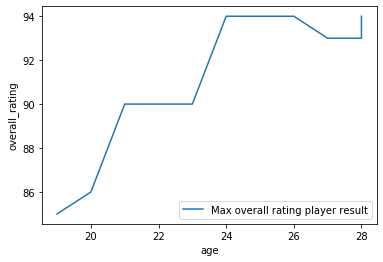

In [104]:
plt.plot(Player_Sample['age'], Player_Sample['overall_rating'], label='Max overall rating player result')
plt.xlabel('age')
plt.ylabel('overall_rating')
plt.legend()
plt.show()

13. Player_Attributes tablosundaki overall_rating kolonunu (10,5) boyutunda bir histogram olarak plot edin. Histogramın bin sayısını 30, rengini mavi olarak ayarlayın. Grafikteki etiketlerin ve başlığın doğru şekilde göründüğünden emin olun. Grafiği sayısal olarak da anlayabilmek adına grafiğin altına overall_rating kolonunun descriptive istatistiklerini print edin (.describe()). 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f8f5890>]],
      dtype=object)

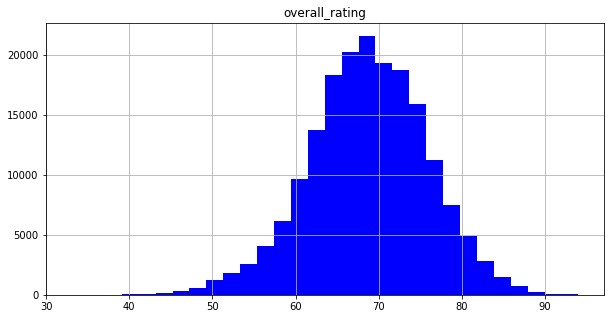

In [105]:
Player_Attributes.hist(column="overall_rating",figsize=(10,5),bins=30, color='#0000FF') 

In [106]:
Player_Attributes['overall_rating'].describe() #descriptive properties of overall_rating

count    183978.000000
mean         68.600015
std           7.025124
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

14. Benzer şekilde age kolonunu plot edin (histogram).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f570b50>]],
      dtype=object)

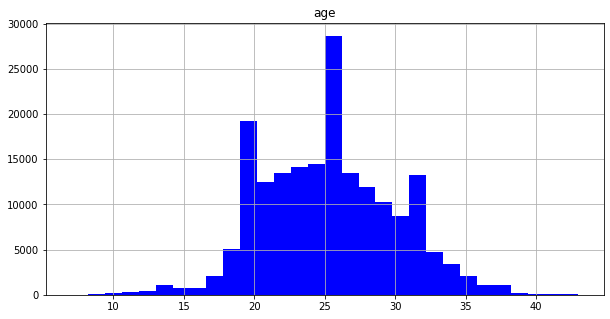

In [107]:
Player_Attributes.hist(column="age",figsize=(10,5),bins=30, color='#0000FF') 

In [108]:
Player_Attributes['age'].describe() #descriptive properties of overall_rating

count    183978.000000
mean         25.203426
std           4.733836
min           7.000000
25%          22.000000
50%          25.000000
75%          28.000000
max          43.000000
Name: age, dtype: float64

15. Overall_rating'in age'e göre dağılımını plot edin (scatter plot).

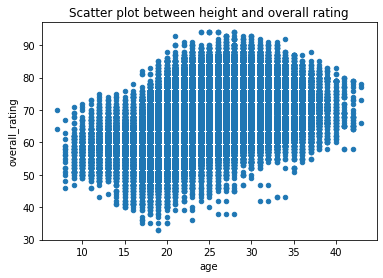

In [109]:
Player_Attributes.plot.scatter(x='age', y='overall_rating', title= "Scatter plot between height and overall rating");
plt.show(block=True);

16. Dağılım grafiğini daha anlaşılır kılabilmek için age kolonunu bin'lere bölüp boxplot olarak çizin ve overall_rating'e göre değişimlerini gözlemleyin. Bin'lere bölme ve plotting işlemini yapmak için aşağıda yarım olarak verilmiş kod bloğunu kullanabilirsiniz.

In [127]:
#bu soruyu anlayamadım çözümü konusunda yardımcı olabilir misiniz? 
age_bins = [0, 20, 22, 24, 26, 28, 30, 32, np.inf]
age_bin_names = ['<20', '20-22', '22-24', '24-26', '26-28', '28-30', '30-32', '>32']

Player_Attributes['age_bin'] = pd.cut(x=Player_Attributes['age'], bins=age_bins)

age1 = Player_Attributes[(Player_Attributes['age_bin'] == age_bin_names[0])]
age2 = Player_Attributes[(Player_Attributes['age_bin'] == age_bin_names[1])]
age3 = Player_Attributes[(Player_Attributes['age_bin'] == age_bin_names[2])]
age4 = Player_Attributes[(Player_Attributes['age_bin'] == age_bin_names[3])]
age5 = Player_Attributes[(Player_Attributes['age_bin'] == age_bin_names[4])]
age6 = Player_Attributes[(Player_Attributes['age_bin'] == age_bin_names[5])]
age7 = Player_Attributes[(Player_Attributes['age_bin'] == age_bin_names[6])]
age8 = Player_Attributes[(Player_Attributes['age_bin'] == age_bin_names[7])]

age_bin_data = [ age1, age2, age3, age4, age5, age6, age7, age8 ]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
plt.boxplot(age_bin_data, patch_artist=True)
axes.set(Player_Attributes['overall_rating'])
axes.yaxis.grid(True)
axes.set_xticklabels(age_bin_names, ha='center')
plt.show()

17. height vs overall_rating scatter plotunu çizin.

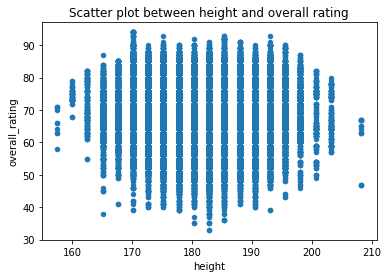

In [46]:
#plt.scatter(Player_Attributes["height"], Player_Attributes["overall_rating"])
Player_Attributes.plot.scatter(x='height', y='overall_rating', title= "Scatter plot between height and overall rating");
plt.show(block=True);

18. BMI histogramını çizin.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a236bb950>]],
      dtype=object)

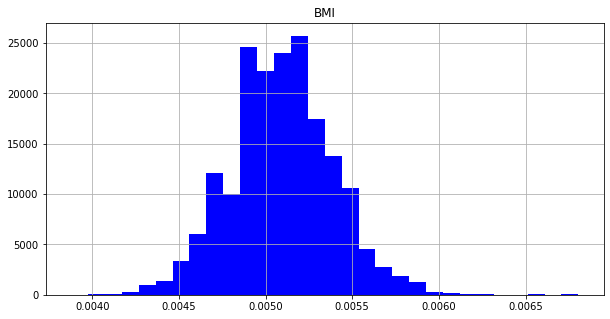

In [47]:
Player_Attributes.hist(column="BMI",figsize=(10,5),bins=30, color='#0000FF') 

19. BMI vs overall_rating histogramını çizin.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f1cc190>],
      dtype=object)

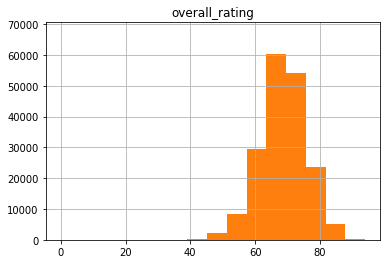

In [48]:
df1 = pd.DataFrame({
    'BMI': Player_Attributes.BMI,
    'overall_rating': Player_Attributes.overall_rating
})

df2 = df1.copy()
fig, ax = plt.subplots()
df1.hist(column=['BMI'], ax=ax)
df2.hist(column=['overall_rating'], ax=ax)

20. Aşağıda verilen attribute'ların overall_rating ile olan korelasyonunu inceleyin ve korelasyon değerlerini barchart olarak çizin.

In [49]:
Numerical_Attributes = ['crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle']

In [50]:
def calculateCorelation(data,Numerical_Attributes):
    #find strength of relationship between two features.
    for i in range(len(Numerical_Attributes)) :
        print(data['overall_rating'].corr(data[Numerical_Attributes[i]]))

In [51]:
calculateCorelation(Player_Attributes,Numerical_Attributes)

0.35769855309822446
0.3292975103897244
0.31409949831588163
0.45836073862617793
0.3590360786226486
0.3543235452126292
0.3553625898424826
0.3495923397232868
0.43501778022924187
0.4442572227999937
0.24565523205744627
0.25484121894612877
0.2382806841611447
0.7692457630342159
0.15928396318288024
0.42799581258472713
0.25727926220172137
0.32745560583464256
0.31866050644064386
0.3923816342074775
0.32393393386197267
0.2503696336340027
0.3700192122478141
0.428233733953158
0.39318875273813364
0.13337650853562014
0.1653491973648783
0.12802095403206154


In [52]:
def plotCorrelation(data):
    x=pd.DataFrame(data, columns = Numerical_Attributes)
    corr = x.corr()
    ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(500, 500, n=300),
    square=True
    )
    ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
    );

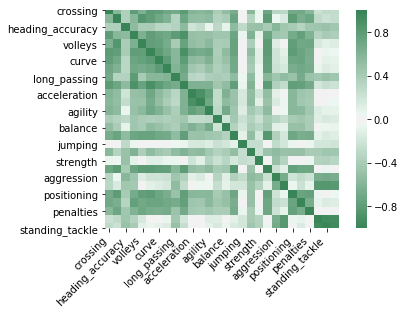

In [53]:
plotCorrelation(Player_Attributes)